Assignment – Model Selection
Do the following on titanic dataset 
1. Load the dataset into python environment 
2. Do all the necessary pre-processing steps 
3. Create kNN and SVM models 
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the 
average accuracy score of the models 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load data
data = pd.read_csv("titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Basic statistical information
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.shape

(891, 12)

### Exploratory Data Analysis

In [7]:
data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [8]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

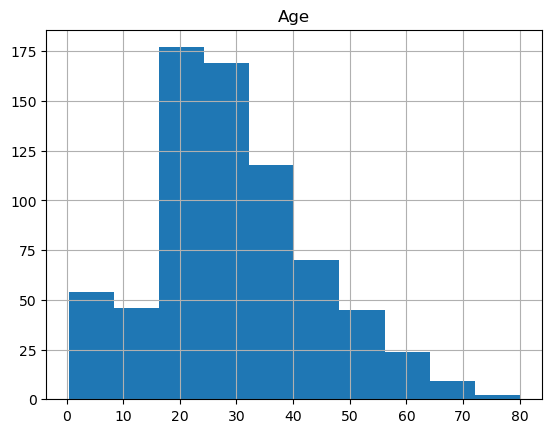

In [13]:
data.hist('Age')

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

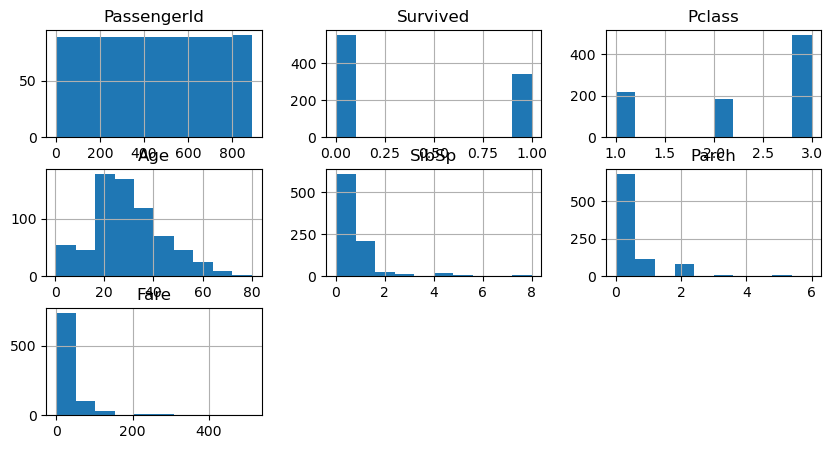

In [15]:
# histograms
freqgraph = data.select_dtypes(include=['int64','float64'])
freqgraph.hist(figsize=(10,5))
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Density'>

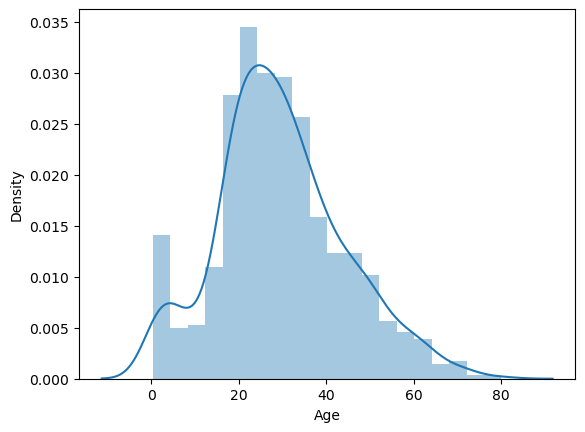

In [16]:
sns.distplot(data['Age'])

<AxesSubplot: xlabel='Fare', ylabel='Density'>

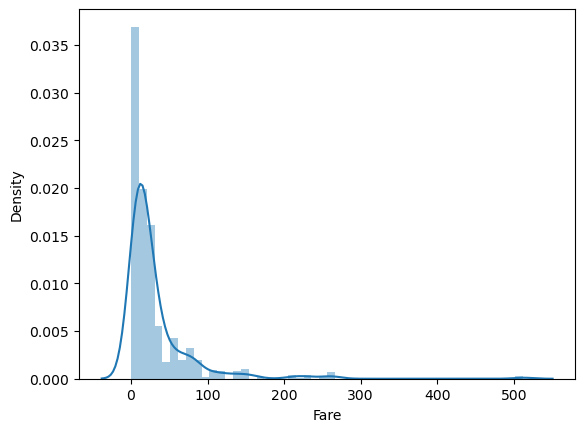

In [17]:
sns.distplot(data['Fare'])

In [18]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [19]:
# log transformation
data['Fare'] = np.log(data['Fare']+1)

<AxesSubplot: xlabel='Fare', ylabel='Density'>

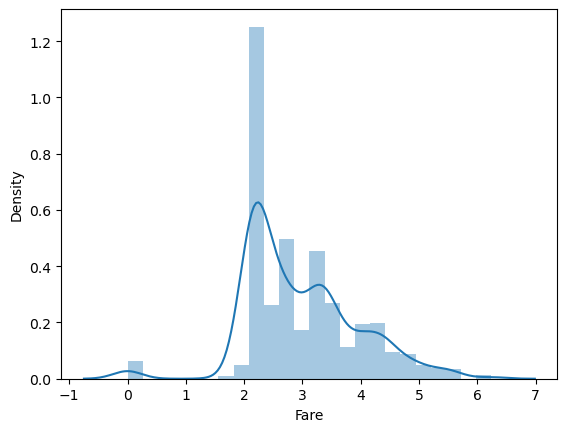

In [20]:
sns.distplot(data['Fare'])

### Correlation

<AxesSubplot: >

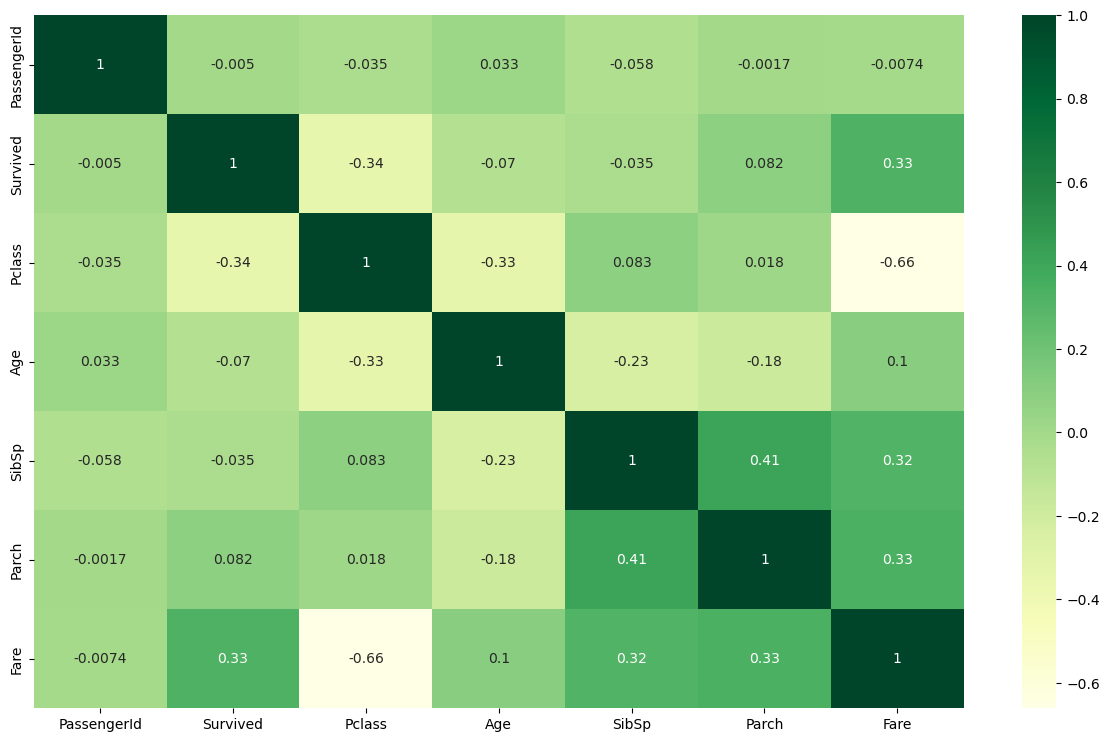

In [21]:
# Correlation
corr = data.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True, cmap='YlGn')

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,B96 B98,S


In [23]:
data = data.drop(columns=['Name','Ticket','Cabin','PassengerId'])

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S


### Label Encoding

In [25]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

for i in cols:
    data[i] = le.fit_transform(data[i])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


# Classification models

### Train test split

In [26]:
# Split into feature and target
y = data['Survived']
x = data.drop(['Survived'],axis=1)

In [27]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [28]:
# model training
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

### i. kNN Model

In [30]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_k = model.predict(x_test)
    acc_k = accuracy_score(y_test,y_pred_k)
    metric_k.append(acc_k)
    
cv_score_k = cross_val_score(model,x,y,cv=5)
print('CV Score : ', np.mean(cv_score_k))

CV Score :  0.7351829765865294


In [31]:
metric_k

[0.7932960893854749,
 0.7374301675977654,
 0.7932960893854749,
 0.7653631284916201,
 0.7653631284916201,
 0.7486033519553073,
 0.7597765363128491,
 0.7430167597765364,
 0.770949720670391,
 0.7318435754189944,
 0.7653631284916201,
 0.7262569832402235]

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

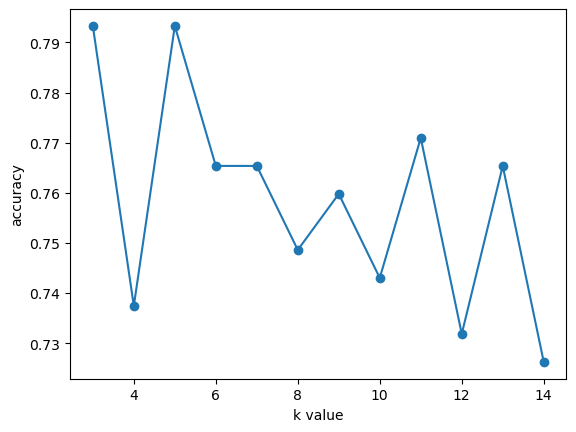

In [32]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid

In [33]:
# optimum value is 5 as per the above plot
# accuracy is high when k value is 5
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred_k = model.predict(x_test)
acc_k = accuracy_score(y_test,y_pred_k)
metric_k.append(acc_k)

In [34]:
y_pred_k

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

##### Summarizing the performance of the algorithm

In [35]:
print('Accuracy = ',acc_k)


Accuracy =  0.7932960893854749


In [36]:
confusion_matrix(y_test,y_pred_k)

array([[92, 13],
       [24, 50]], dtype=int64)

### K-fold cross validation

In [37]:
from sklearn.model_selection import KFold

In [38]:
kfold_validator = KFold(10)

In [39]:
for train_index, test_index in kfold_validator.split(x,y):
    print('Training index : ',train_index)
    print('Testing index : ',test_index)

Training index :  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [40]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model,x,y,cv=kfold_validator)
cv_score

array([0.7       , 0.79775281, 0.7752809 , 0.76404494, 0.78651685,
       0.75280899, 0.78651685, 0.74157303, 0.82022472, 0.80898876])

In [41]:
print('Average accuracy score of kNN model with k-fold cross validataion : ',np.mean(cv_score))

Average accuracy score of kNN model with k-fold cross validataion :  0.7733707865168539


### Stratified k-fold Cross Validation

In [42]:
from sklearn.model_selection import StratifiedKFold

In [43]:
skfold_validator = StratifiedKFold(n_splits=10)
for train_index, test_index in skfold_validator.split(x,y):
    print('Training index : ',train_index)
    print('Testing index : ',test_index)

Training index :  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [44]:
skcv_score = cross_val_score(model,x,y,cv=skfold_validator)
skcv_score

array([0.73333333, 0.76404494, 0.71910112, 0.79775281, 0.79775281,
       0.74157303, 0.84269663, 0.78651685, 0.79775281, 0.78651685])

In [45]:
print('Average accuracy score of kNN model with Stratified k-fold cross validation: ',np.mean(skcv_score))

Average accuracy score of kNN model with Stratified k-fold cross validation:  0.7767041198501873


### ii (a) SVM Model with Linear Kernel

In [46]:
# import svm classifier 
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train, y_train)
y_pred_svm = svmclf.predict(x_test)

##### Summarizing the performance of the algorithm

In [47]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.7821229050279329


In [48]:
print(confusion_matrix(y_test,y_pred_svm))

[[88 17]
 [22 52]]


### ii (b) SVC with rbf Kernel

In [49]:
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train, y_train)
y_pred_SVCr = svmclf.predict(x_test)
y_pred_SVCr

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

##### Summarizing the performance of the algorithm

In [50]:
print('Accuracy = ',accuracy_score(y_test,y_pred_SVCr))

Accuracy =  0.6089385474860335


### iii. SVC with poly Kernel

In [51]:
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train, y_train)
y_pred_SVCp = svmclf.predict(x_test)
y_pred_SVCp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

##### Summarizing the performance of the alogorithm

In [52]:
print('Accuracy = ',accuracy_score(y_test,y_pred_SVCp))


Accuracy =  0.5977653631284916


In [53]:
# SVC with linear is having high accuracy
# Applying k-fold and Stratified k-fold to SVC with linear model

### K-fold cross validation

In [54]:
kfold_validator = KFold(10)
for train_index, test_index in kfold_validator.split(x,y):
    print('Training index : ',train_index)
    print('Testing index : ',test_index)

Training index :  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [55]:
cv_score = cross_val_score(svmclf,x,y,cv=kfold_validator)
cv_score

array([0.63333333, 0.75280899, 0.69662921, 0.60674157, 0.64044944,
       0.70786517, 0.66292135, 0.64044944, 0.76404494, 0.71910112])

In [56]:
print('Average accuracy score of SVM model with k-fold cross validation: ',np.mean(cv_score))

Average accuracy score of SVM model with k-fold cross validation:  0.682434456928839


### Stratified k-fold Cross Validation

In [57]:
skfold_validator = StratifiedKFold(n_splits=10)

In [58]:
for train_index, test_index in skfold_validator.split(x,y):
    print('Training index : ',train_index)
    print('Testing index : ',test_index)

Training index :  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [59]:
skcv_score = cross_val_score(svmclf,x,y,cv=skfold_validator)
skcv_score

array([0.67777778, 0.64044944, 0.70786517, 0.69662921, 0.6741573 ,
       0.68539326, 0.70786517, 0.64044944, 0.71910112, 0.69662921])

In [60]:
print('Average accuracy score of SVM model with stratified k-fold cross validation: ',np.mean(skcv_score))

Average accuracy score of SVM model with stratified k-fold cross validation:  0.6846317103620475
